In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from wordcloud import WordCloud

In [48]:

!pip install nltk


In [49]:
!pip install wordcloud


In [50]:
!pip install scikit-learn

In [51]:
df = pd.read_csv('tweet_emotions.csv')
df.head()

tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...

In [52]:
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [53]:
df.duplicated().sum()

0

In [54]:
df.drop('tweet_id', axis=1, inplace=True)

In [55]:
df

sentiment                                            content
0           empty  @tiffanylue i know  i was listenin to bad habi...
1         sadness  Layin n bed with a headache  ughhhh...waitin o...
2         sadness                Funeral ceremony...gloomy friday...
3      enthusiasm               wants to hang out with friends SOON!
4         neutral  @dannycastillo We want to trade with someone w...
...           ...                                                ...
39995     neutral                                   @JohnLloydTaylor
39996        love                     Happy Mothers Day  All my love
39997        love  Happy Mother's Day to all the mommies out ther...
39998   happiness  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999        love  @mopedronin bullet train from tokyo    the gf ...

[40000 rows x 2 columns]

In [59]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

In [65]:
def clean(text):
    print(f"Original text: {text}")
    
    # Convert text to lowercase
    text = text.lower()
    print(f"Lowercase text: {text}")
    
    # Remove punctuation and special characters
    text = re.sub('[^\w\s]', '', text)
    print(f"Text after removing punctuation: {text}")
    
    # Remove stopwords
    text = [word for word in text.split() if word not in stop_words]
    print(f"Text after removing stopwords: {text}")
    
    # Apply stemming
    text = [stemmer.stem(w) for w in text]
    print(f"Text after stemming: {text}")
    
    return text

<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Nidhithashree k\AppData\Local\Temp\ipykernel_20852\188368077.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('[^\w\s]', '', text)


In [67]:
import re  # Ensure re module is imported
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# Initialize stopwords and stemmer
nltk.download('stopwords')  # Ensure you download stopwords if not done already
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

def clean(text):
    print(f"Original text: {text}")
    
    # Convert text to lowercase
    text = text.lower()
    print(f"Lowercase text: {text}")
    
    # Remove punctuation and special characters (use raw string or double backslashes)
    text = re.sub(r'[^\w\s]', '', text)  # Using raw string (r'...') to avoid invalid escape sequence
    print(f"Text after removing punctuation: {text}")
    
    # Remove stopwords
    text = [word for word in text.split() if word not in stop_words]
    print(f"Text after removing stopwords: {text}")
    
    # Apply stemming
    text = [stemmer.stem(w) for w in text]
    print(f"Text after stemming: {text}")
    
    return text

# Example usage for debugging
sample_text = "Hello! This is an example sentence to test the cleaning function."
cleaned_text = clean(sample_text)
print(f"Final cleaned text: {cleaned_text}")


Original text: Hello! This is an example sentence to test the cleaning function.
Lowercase text: hello! this is an example sentence to test the cleaning function.
Text after removing punctuation: hello this is an example sentence to test the cleaning function
Text after removing stopwords: ['hello', 'example', 'sentence', 'test', 'cleaning', 'function']
Text after stemming: ['hello', 'exampl', 'sentenc', 'test', 'clean', 'function']
Final cleaned text: ['hello', 'exampl', 'sentenc', 'test', 'clean', 'function']


[nltk_data] Downloading package stopwords to C:\Users\Nidhithashree
[nltk_data]     k\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
df['text'] = df['content'].apply(lambda x: clean(x))
df['text'] = df['text'].apply(lambda x: ' '.join(x))

Original text: @tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[
Lowercase text: @tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[
Text after removing punctuation: tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part 
Text after removing stopwords: ['tiffanylue', 'know', 'listenin', 'bad', 'habit', 'earlier', 'started', 'freakin', 'part']
Text after stemming: ['tiffanylu', 'know', 'listenin', 'bad', 'habit', 'earlier', 'start', 'freakin', 'part']
Original text: Layin n bed with a headache  ughhhh...waitin on your call...
Lowercase text: layin n bed with a headache  ughhhh...waitin on your call...
Text after removing punctuation: layin n bed with a headache  ughhhhwaitin on your call
Text after removing stopwords: ['layin', 'n', 'bed', 'headache', 'ughhhhwaitin', 'call']
Text after stemming: ['layin', 'n', 'bed', 'headach', 'ughhhhwaitin', 'call']
Original text: Fune

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Text after stemming: ['mjasenn', 'total', 'owe', 'week', 'oncal', 'duti', 'appreci', 'jill', 'town']
Original text: @Icethevillain hmmm; somewhat.. i would say more spontaneouz
Lowercase text: @icethevillain hmmm; somewhat.. i would say more spontaneouz
Text after removing punctuation: icethevillain hmmm somewhat i would say more spontaneouz
Text after removing stopwords: ['icethevillain', 'hmmm', 'somewhat', 'would', 'say', 'spontaneouz']
Text after stemming: ['icethevillain', 'hmmm', 'somewhat', 'would', 'say', 'spontaneouz']
Original text: @therami well, so are you  but i managed to go to sleep for another couple of hours and wake up again while you're still snoozing
Lowercase text: @therami well, so are you  but i managed to go to sleep for another couple of hours and wake up again while you're still snoozing
Text after removing punctuation: therami well so are you  but i managed to go to sleep for another couple of hours and wake up again while youre still snoozing
Text after remo

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Text after stemming: ['ninjafanpir', 'anytim', 'im', 'cant', 'match', 'stamina', 'nice', 'warm', 'comfi', 'bed', 'call', 'scream', 'namelol', 'night', 'ninja']
Original text: @nikhilnarayanan Had not noticed. Must be leading to some inventory tracking issues too, if the s/ws only support standard SKUs
Lowercase text: @nikhilnarayanan had not noticed. must be leading to some inventory tracking issues too, if the s/ws only support standard skus
Text after removing punctuation: nikhilnarayanan had not noticed must be leading to some inventory tracking issues too if the sws only support standard skus
Text after removing stopwords: ['nikhilnarayanan', 'noticed', 'must', 'leading', 'inventory', 'tracking', 'issues', 'sws', 'support', 'standard', 'skus']
Text after stemming: ['nikhilnarayanan', 'notic', 'must', 'lead', 'inventori', 'track', 'issu', 'sws', 'support', 'standard', 'skus']
Original text: still making icons
Lowercase text: still making icons
Text after removing punctuation: still 

In [71]:
df.head()

sentiment                                            content  \
0       empty  @tiffanylue i know  i was listenin to bad habi...   
1     sadness  Layin n bed with a headache  ughhhh...waitin o...   
2     sadness                Funeral ceremony...gloomy friday...   
3  enthusiasm               wants to hang out with friends SOON!   
4     neutral  @dannycastillo We want to trade with someone w...   

                                                text  
0  tiffanylu know listenin bad habit earlier star...  
1              layin n bed headach ughhhhwaitin call  
2                        funer ceremonygloomi friday  
3                              want hang friend soon  
4  dannycastillo want trade someon houston ticket...

In [73]:
X = np.array(df['text'])
y = np.array(df['sentiment'])

In [75]:
le = LabelEncoder()
y = le.fit_transform(y)

In [77]:
#Vectorizing the text column
vec = TfidfVectorizer()
X = vec.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [79]:
from sklearn.metrics import confusion_matrix

In [81]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

C:\Users\Nidhithashree k\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nidhithashree k\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nidhithashree k\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00       162
           3       0.00      0.00      0.00       163
           4       0.00      0.00      0.00       338
           5       0.40      0.11      0.17      1028
           6       0.00      0.00      0.00       268
           7       0.59      0.13      0.21       762
           8       0.31      0.45      0.37      1740
           9       0.00      0.00      0.00       352
          10       0.35      0.01      0.01      1046
          11       0.00      0.00      0.00       425
          12       0.26      0.78      0.39      1666

    accuracy                           0.29      8000
   macro avg       0.15      0.11      0.09      8000
weighted avg       0.27      0.29      0.20      8000



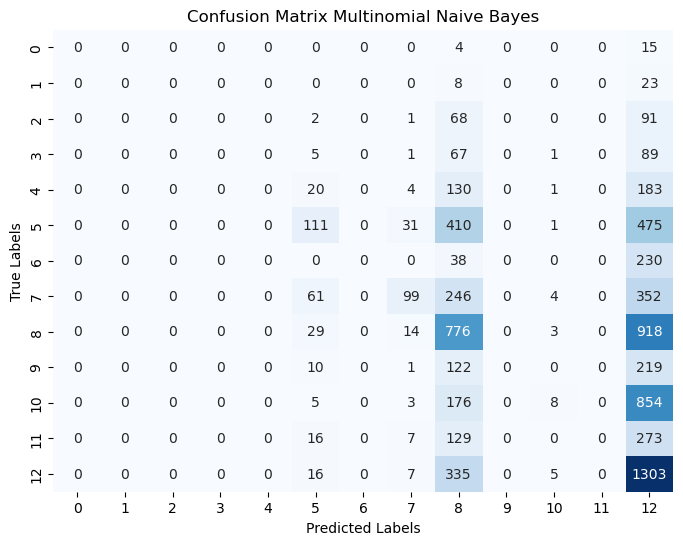

In [83]:
nb_pred = nb.predict(X_test)
print(classification_report(y_test, nb_pred))
# Calculating the confusion matrix
confusion_mat = confusion_matrix(y_test, nb_pred)
# Heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Multinomial Naive Bayes')
plt.show()

C:\Users\Nidhithashree k\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nidhithashree k\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nidhithashree k\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and be

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00       162
           3       0.00      0.00      0.00       163
           4       0.12      0.01      0.02       338
           5       0.33      0.33      0.33      1028
           6       0.52      0.13      0.20       268
           7       0.51      0.38      0.44       762
           8       0.33      0.60      0.43      1740
           9       0.35      0.02      0.03       352
          10       0.37      0.24      0.29      1046
          11       0.33      0.03      0.06       425
          12       0.33      0.48      0.39      1666

    accuracy                           0.35      8000
   macro avg       0.25      0.17      0.17      8000
weighted avg       0.34      0.35      0.31      8000



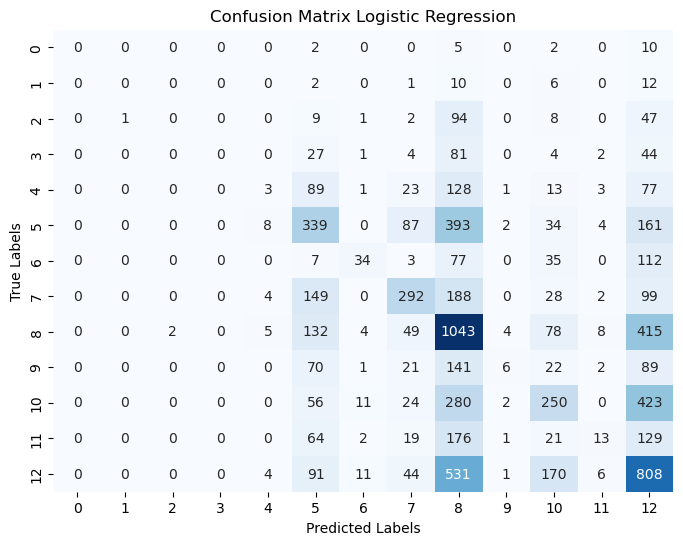

In [85]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(classification_report(y_test, lr_pred))
# Calculating the confusion matrix
confusion_mat = confusion_matrix(y_test, lr_pred)
# Heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

C:\Users\Nidhithashree k\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nidhithashree k\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nidhithashree k\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00       162
           3       0.00      0.00      0.00       163
           4       0.12      0.02      0.04       338
           5       0.31      0.31      0.31      1028
           6       0.38      0.18      0.24       268
           7       0.45      0.40      0.42       762
           8       0.32      0.57      0.41      1740
           9       0.17      0.01      0.02       352
          10       0.36      0.23      0.28      1046
          11       0.22      0.04      0.06       425
          12       0.32      0.45      0.38      1666

    accuracy                           0.33      8000
   macro avg       0.20      0.17      0.17      8000
weighted avg       0.31      0.33      0.30      8000



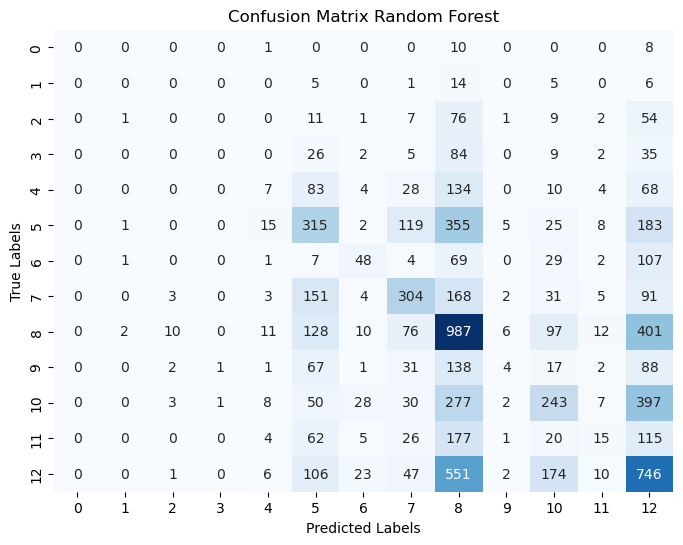

In [87]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))

# Calculating the confusion matrix
confusion_mat = confusion_matrix(y_test, rf_pred)
# Heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Random Forest')
plt.show()

In [109]:
from transformers import pipeline

# Load a pre-trained model for emotion detection
emotion_classifier = pipeline('text-classification', model='j-hartmann/emotion-english-distilroberta-base')

# Example text input
text = input(str("Enter the sentence for text detection:"))

# Get emotion prediction fpr text detection 
result = emotion_classifier(text)
print(result)


C:\Users\Nidhithashree k\anaconda\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Enter the sentence for text detection: i am so sad


[{'label': 'sadness', 'score': 0.9906665682792664}]
